# Red Wine quality analysis

## Installing all necessary libraries

In [1]:
!pip install pandas
!pip install seaborn
!pip install catboost
!pip install sklearn
!pip install matplotlib

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
    

## Importing all necessary libraries

In [2]:
import pandas as  pd
import seaborn as sns
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Data loading and visualisation

In [3]:
df = pd.read_csv('data/winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<Axes: >

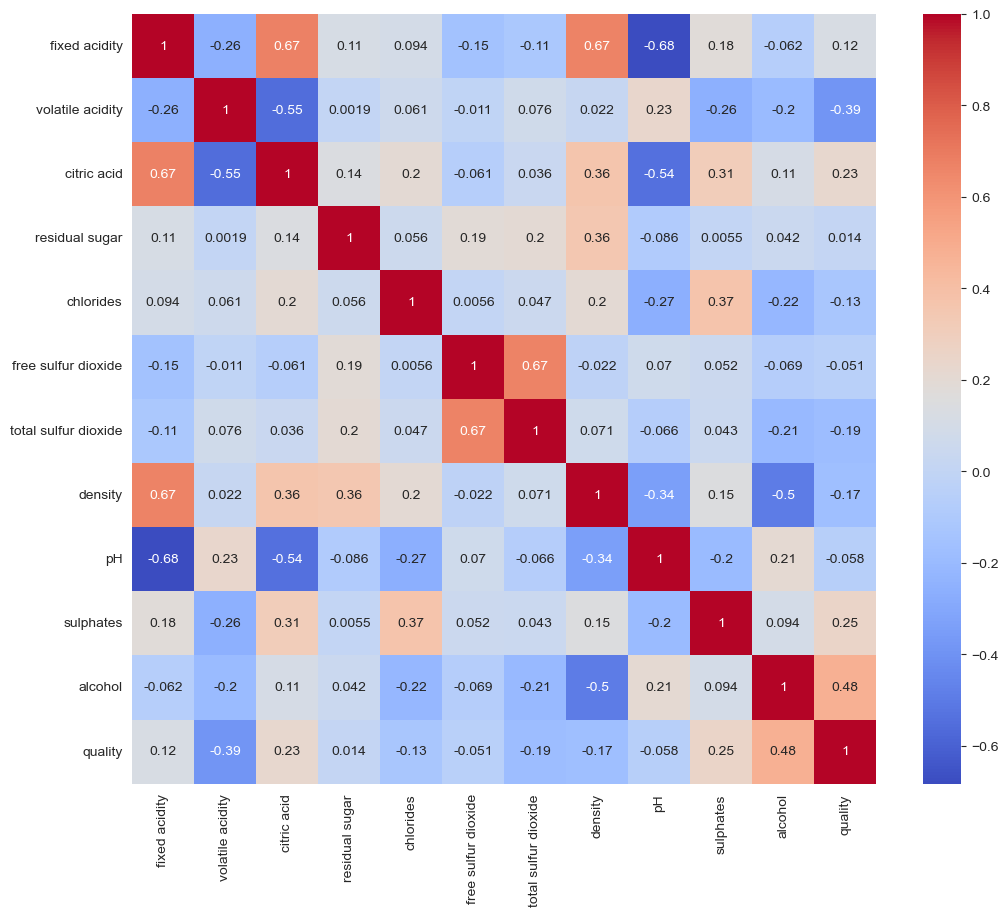

In [6]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")

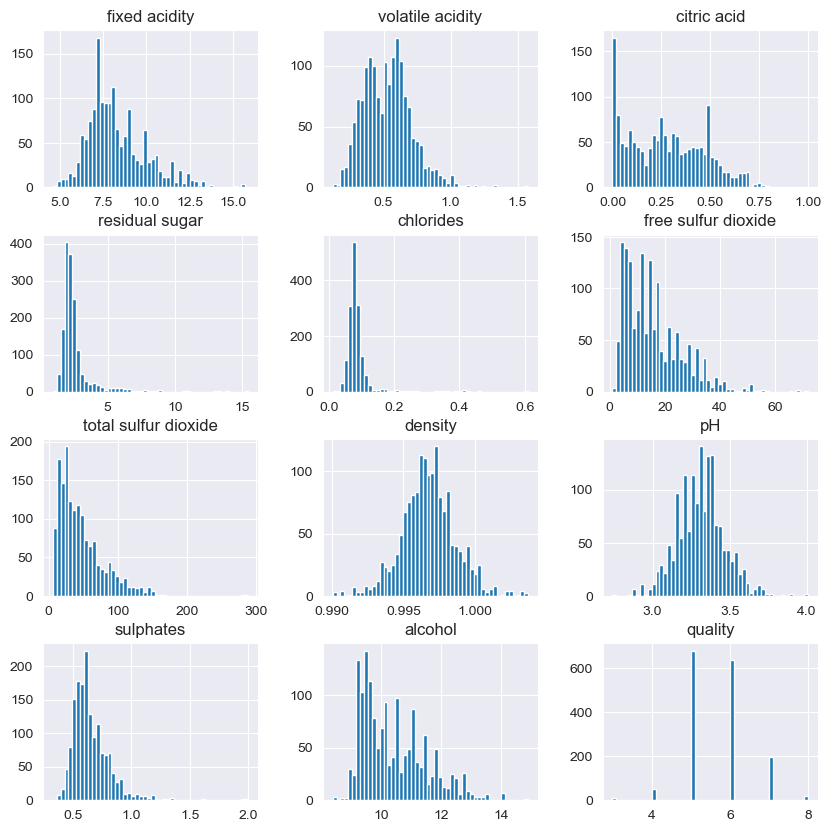

In [7]:
df.hist(bins=50, figsize=(10, 10))
plt.show()

### Alcohol and quality correlation checking

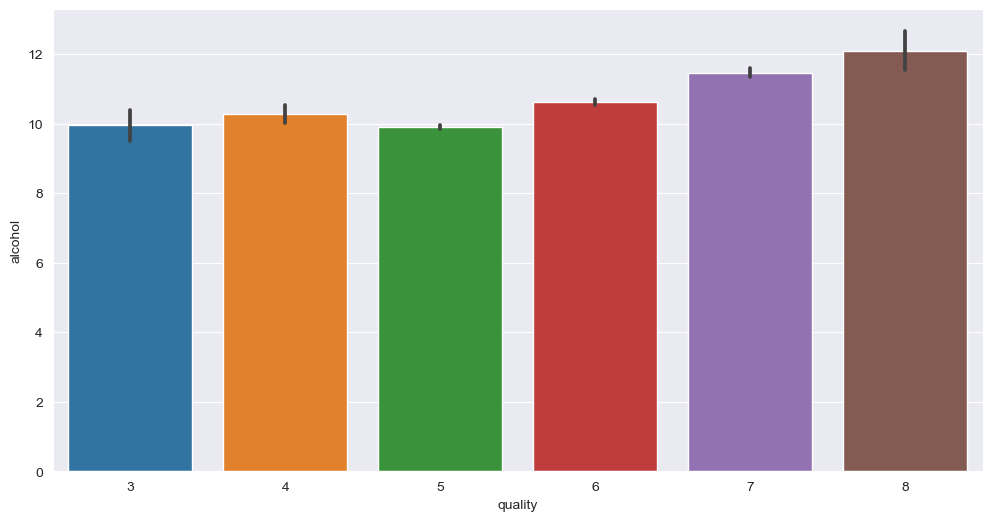

In [8]:
plt.figure(figsize = (12,6))
sns.barplot(x='quality', y = 'alcohol', data = df)
plt.show()

## Preparing data

In [9]:
X = df.drop(['quality'], axis = 1)
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 52)

## Different models testing

In [10]:
scaler = StandardScaler().fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [11]:
regression = LogisticRegression()
regression.fit(X_train_std, y_train)
prediction = regression.predict(X_test_std)
regression_accuracy = accuracy_score(y_test, prediction)
regression_accuracy

0.565625

In [12]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_std, y_train)
decision_tree_accuracy = accuracy_score(y_test, decision_tree.predict(X_test_std))
decision_tree_accuracy

0.578125

In [13]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train_std, y_train)
random_forest_accuracy = accuracy_score(y_test, random_forest.predict(X_test_std))
random_forest_accuracy

0.653125

In [14]:
catboost = CatBoostRegressor(verbose=False)
catboost.fit(X_train_std, y_train)
catboost.predict(X_test_std)
catboost_accuracy = catboost.score(X_test_std, y_test)
catboost_accuracy

0.47598609794154745

## Summing up and selecting the best model

In [15]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'CatBoost']
accuracies = [regression_accuracy, decision_tree_accuracy, random_forest_accuracy, catboost_accuracy]

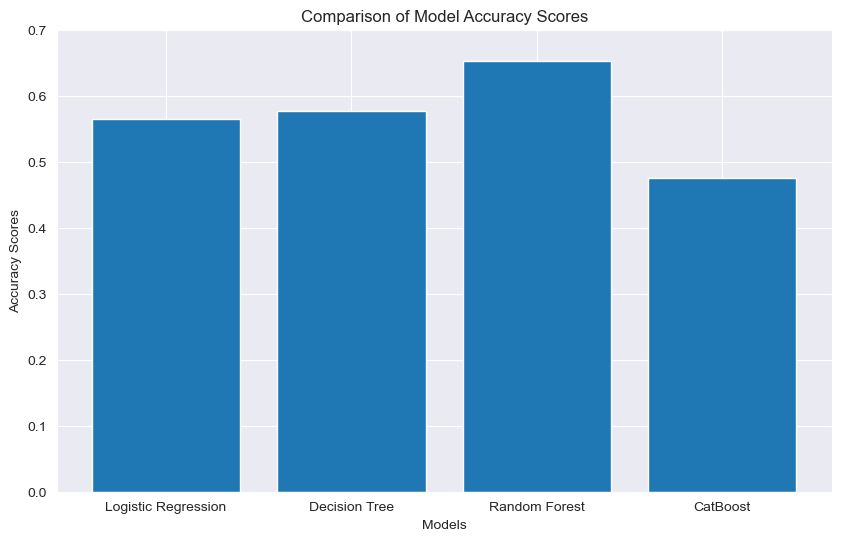

In [16]:
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies)
plt.xlabel('Models')
plt.ylabel('Accuracy Scores')
plt.title('Comparison of Model Accuracy Scores')
plt.ylim(0, 0.7)  
plt.show()